In [70]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Data_base_learning_v2 = main_path+open_folder[3]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [72]:
train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1714,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
1287,1715,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
1288,1716,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
1289,1717,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [73]:
X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv['score'].values
X[0]

array([  -1,   -1,   -1,   -1, 2409, 6154], dtype=int64)

In [74]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032,)


In [75]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [76]:
# for row in y_train:
#      print(row)

In [77]:
x_train

array([[    1,     0,     0,     2,  7928,  6735],
       [    0,     0,     0,     1,  4059,  6273],
       [    0,     0,     1,     0,  9495,  2298],
       ...,
       [    1,     0,     0,     0, 10390,  7928],
       [    0,     0,     0,     2,  9770,  5396],
       [    0,     0,     1,     3,  2280,  3086]], dtype=int64)

In [106]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [107]:
model = create_model()
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_137 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_138 (Dense)            (None, 3)                 387       
Total params: 69,635
Trainable params: 69,635
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 1s 849us/sample - loss: 214.0256 - accuracy: 0.4196 - val_loss: 156.0885 - val_accuracy: 0.3861
Epoch 2/200
1032/1032 [==============================] - 0s 166us/sample - loss: 122.3647 - accuracy: 0.4196 - val_loss: 169.7547 - val_accuracy: 0.2201
Epoch 3/200
1032/1032 [==============================] - 0s 85us/sample - loss: 147.5191 - accuracy: 0.3934 - val_loss: 123.1277 - val_accuracy: 0.4826
Epoch 4/200
1032/1032 [==============================] - 0s 76us/sample - loss: 88.3840 - accuracy: 0.4176 - val_loss: 104.1685 - val_accuracy: 0.3166
Epoch 5/200
1032/1032 [==============================] - 0s 92us/sample - loss: 61.7868 - accuracy: 0.4225 - val_loss: 140.3612 - val_accuracy: 0.3552
Epoch 6/200
1032/1032 [==============================] - 0s 92us/sample - loss: 112.3458 - accuracy: 0.4205 - val_loss: 95.6334 - val_accuracy: 0.2587
Epoch 7/200
1032/1032 [===================

Epoch 55/200
1032/1032 [==============================] - 0s 88us/sample - loss: 39.0357 - accuracy: 0.4118 - val_loss: 29.4978 - val_accuracy: 0.3938
Epoch 56/200
1032/1032 [==============================] - 0s 116us/sample - loss: 27.6535 - accuracy: 0.4099 - val_loss: 10.4072 - val_accuracy: 0.5058
Epoch 57/200
1032/1032 [==============================] - 0s 96us/sample - loss: 12.3325 - accuracy: 0.4157 - val_loss: 13.0085 - val_accuracy: 0.3668
Epoch 58/200
1032/1032 [==============================] - 0s 100us/sample - loss: 26.3724 - accuracy: 0.4060 - val_loss: 20.4779 - val_accuracy: 0.3475
Epoch 59/200
1032/1032 [==============================] - 0s 121us/sample - loss: 23.4066 - accuracy: 0.3818 - val_loss: 15.6430 - val_accuracy: 0.4865
Epoch 60/200
1032/1032 [==============================] - 0s 118us/sample - loss: 18.0834 - accuracy: 0.4380 - val_loss: 13.3555 - val_accuracy: 0.4672
Epoch 61/200
1032/1032 [==============================] - 0s 103us/sample - loss: 20.1982 

Epoch 109/200
1032/1032 [==============================] - 0s 90us/sample - loss: 14.2770 - accuracy: 0.4176 - val_loss: 18.8796 - val_accuracy: 0.2239
Epoch 110/200
1032/1032 [==============================] - 0s 112us/sample - loss: 12.0110 - accuracy: 0.4070 - val_loss: 16.7276 - val_accuracy: 0.3127
Epoch 111/200
1032/1032 [==============================] - 0s 92us/sample - loss: 11.6154 - accuracy: 0.3953 - val_loss: 8.8264 - val_accuracy: 0.3243
Epoch 112/200
1032/1032 [==============================] - 0s 112us/sample - loss: 7.5648 - accuracy: 0.4234 - val_loss: 3.6467 - val_accuracy: 0.5212
Epoch 113/200
1032/1032 [==============================] - 0s 148us/sample - loss: 10.2764 - accuracy: 0.3886 - val_loss: 7.8369 - val_accuracy: 0.3591
Epoch 114/200
1032/1032 [==============================] - 0s 88us/sample - loss: 11.2771 - accuracy: 0.4205 - val_loss: 10.6536 - val_accuracy: 0.3745
Epoch 115/200
1032/1032 [==============================] - 0s 88us/sample - loss: 7.9879 

1032/1032 [==============================] - 0s 99us/sample - loss: 4.6167 - accuracy: 0.4574 - val_loss: 15.1807 - val_accuracy: 0.2124
Epoch 164/200
1032/1032 [==============================] - 0s 110us/sample - loss: 6.9609 - accuracy: 0.4341 - val_loss: 4.7335 - val_accuracy: 0.5444
Epoch 165/200
1032/1032 [==============================] - 0s 105us/sample - loss: 5.1413 - accuracy: 0.4302 - val_loss: 7.9280 - val_accuracy: 0.4440
Epoch 166/200
1032/1032 [==============================] - 0s 102us/sample - loss: 5.1895 - accuracy: 0.4293 - val_loss: 2.7584 - val_accuracy: 0.5212
Epoch 167/200
1032/1032 [==============================] - 0s 107us/sample - loss: 3.9005 - accuracy: 0.4302 - val_loss: 7.9669 - val_accuracy: 0.3282
Epoch 168/200
1032/1032 [==============================] - 0s 131us/sample - loss: 6.6376 - accuracy: 0.4031 - val_loss: 4.5000 - val_accuracy: 0.4286
Epoch 169/200
1032/1032 [==============================] - 0s 97us/sample - loss: 3.7185 - accuracy: 0.4244 

Text(0, 0.5, 'Accuracy')

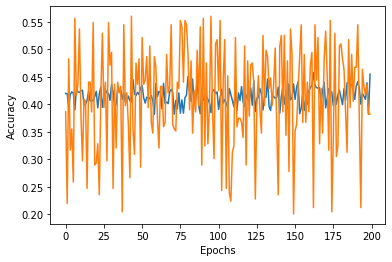

In [109]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [110]:
predictions = model.predict((x_test, y_test))

In [111]:
print(x_test[98])
print(y_test[98])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[98])
np.argmax(predictions[98])

[   0    0    3    0 2866 4490]
2
[0.03437076 0.795695   0.16993429]


1

# Prédiction Unique

In [145]:
unique = train_csv.values
results = []
equal = []
victory = []
loss = []
i = 0

In [146]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]
    victoire = predictions1[0][1]
    perte = predictions1[0][2]
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire , perte ,puissance_homeTeam,puissance_awayTeam)

1 0.027086161 0.5965682 0.3763456 2409 6154
0 0.4044095 0.3264381 0.26915237 4008 3054
1 0.06575351 0.55316836 0.3810782 3029 100
0 0.39841935 0.28201392 0.3195667 2803 2045
2 0.37945014 0.23921032 0.38133946 2156 1065
0 0.38278374 0.3437474 0.2734688 2690 2298
1 0.0035467818 0.7693 0.22715323 100 3749
0 0.39179817 0.297223 0.31097886 4207 3029
2 0.3597562 0.2502413 0.39000252 3627 1736
1 9.43528e-06 0.9997918 0.00019878642 9495 2020
0 0.4809691 0.26096722 0.25806364 6154 2690
1 0.036783684 0.67393875 0.28927752 3029 4008
1 0.07457262 0.6285567 0.29687068 2298 3029
1 0.14958137 0.58284026 0.2675784 1065 100
1 0.07183129 0.5909146 0.33725408 2020 2803
1 0.09342638 0.5121475 0.39442608 1736 2409
1 0.064134054 0.7630913 0.17277463 2045 4207
0 0.43049198 0.3163846 0.25312337 3749 2156
1 0.08392857 0.5634313 0.35264012 3054 3627
1 9.9744305e-08 0.9919636 0.008036223 100 9495
1 0.05364966 0.53508866 0.4112617 2156 3054
0 0.40376467 0.34846944 0.24776587 2690 1736
1 0.031763986 0.86984694 0.0

1 0.07543491 0.6034013 0.3211637 100 1736
1 0.19513914 0.6510615 0.15379938 3627 3749
1 0.0016537702 0.95915693 0.0391893 100 4008
1 0.029436527 0.822632 0.14793155 2298 6154
1 0.12535289 0.860772 0.013875055 1065 2156
1 0.23897843 0.53374404 0.22727753 2690 2803
1 0.071698144 0.78967345 0.13862842 2020 3054
1 0.08072323 0.63826674 0.28101003 1736 3627
1 0.06624601 0.59971267 0.3340413 2045 3029
1 0.3798399 0.5270578 0.09310224 3749 3029
1 0.0011570059 0.94194764 0.056895357 100 4207
1 0.0004389477 0.99647224 0.0030888144 9495 2409
1 0.08041039 0.63672584 0.28286377 2020 100
1 0.07030295 0.6876014 0.24209559 2045 3054
2 0.0004553964 0.14898776 0.8505569 2409 9495
1 0.05711781 0.52810556 0.41477656 2803 100
0 0.4000756 0.3814753 0.21844909 4008 2690
1 0.048416402 0.6485708 0.30301288 3029 100
1 0.41429132 0.43290758 0.15280104 3749 2020
1 0.3455451 0.46046218 0.19399266 2156 2045
0 0.4164599 0.2852447 0.2982954 3054 1736
1 0.047846455 0.6480287 0.30412492 2409 3627
1 3.1171447e-05 0.998

1 0.052347273 0.6365537 0.311099 2512 3982
1 0.36677203 0.4309884 0.2022396 2817 2482
1 0.0032858562 0.901872 0.09484219 3781 8832
1 0.014566967 0.92003274 0.06540028 3890 7311
1 0.2745168 0.3735946 0.3518887 14695 6821
0 0.40155306 0.24661797 0.351829 7938 4146
2 0.0035243148 0.23552553 0.76095015 1880 7151
1 0.012979846 0.5400129 0.44700724 2482 7151
0 0.40729007 0.37127143 0.22143851 2512 1880
2 3.3511582e-09 0.0022081367 0.9977919 1553 14695
1 0.004137578 0.94060045 0.055262018 10390 2956
1 0.17612374 0.747541 0.07633525 7938 7311
1 0.25472844 0.5646118 0.18065982 3883 3781
1 0.0280791 0.5642657 0.40765512 2705 3890
2 0.0028488983 0.38799003 0.60916114 2817 8832
1 0.021696087 0.6107821 0.36752185 4146 5188
1 0.021308595 0.76625544 0.21243596 3982 6821
1 0.08459828 0.6740329 0.24136885 1880 2817
2 0.29391557 0.32652223 0.37956217 8832 4146
0 0.38602895 0.3467688 0.26720223 3890 2482
0 0.42835948 0.31370667 0.2579339 6821 3883
1 0.39551455 0.46933413 0.1351512 3781 2705
1 0.03400105 

2 0.32365376 0.24996634 0.4263799 7938 2705
0 0.36045793 0.28850305 0.35103902 3883 1880
1 0.04095053 0.6703102 0.28873926 2956 3890
0 0.39735368 0.37496185 0.22768454 4146 2817
1 0.02287739 0.86197233 0.115150265 3781 6821
0 0.41556013 0.27778536 0.30665454 8832 3982
1 0.0001423635 0.6527643 0.34709334 7151 10390
1 0.0880396 0.60822594 0.30373442 5188 1553
1 0.00029441714 0.9384489 0.06125662 6139 13105
1 0.0038894995 0.83574957 0.16036095 4059 8949
1 0.36994287 0.4657218 0.16433533 9770 7427
2 0.04676322 0.45503622 0.4982006 2475 3861
1 0.3015201 0.5165492 0.1819307 5396 4803
1 0.007884019 0.71404845 0.2780676 100 3267
1 0.033608552 0.49591672 0.47047475 3663 4554
2 0.009450162 0.4944493 0.49610054 6273 7447
1 0.27181095 0.50961447 0.2185746 4257 4059
1 0.27663583 0.61624426 0.10711987 9329 7881
1 0.003921368 0.6655686 0.33051008 4803 7447
1 0.03327608 0.64892733 0.31779662 4554 5396
1 0.0765631 0.5681274 0.35530946 3267 3861
0 0.39890498 0.3087618 0.29233316 8949 4059
1 0.36639565 0

1 3.3792552e-05 0.964581 0.035385177 100 6273
1 0.008570344 0.89271367 0.098716006 3267 7427
1 0.0026468716 0.8994452 0.09790793 4257 9329
1 0.30393 0.56562823 0.13044171 4554 4059
1 0.36616912 0.37217957 0.26165134 8949 6139
1 0.033230063 0.5566116 0.41015828 4059 100
1 0.32185993 0.5846077 0.09353232 7447 6139
0 0.7127115 0.122764595 0.16452394 9770 3861
1 0.0072097005 0.7287351 0.26405525 7881 8949
1 0.31444928 0.36728922 0.3182615 9329 4554
1 0.00025034652 0.97617847 0.023571253 6273 13105
0 0.40381855 0.31885934 0.27732214 4803 2475
1 0.37368792 0.43254074 0.19377136 7427 5396
1 0.06867371 0.60344607 0.32788026 3663 4257
1 0.39574662 0.45241913 0.15183422 4059 3267
1 1.4204476e-06 0.9905653 0.009433299 100 7881
1 0.3940894 0.4715751 0.13433559 4554 3663
1 0.27730185 0.6514708 0.07122733 8949 7447
1 0.04834286 0.5900205 0.36163667 3267 4059
1 0.0025495915 0.91803205 0.079418406 3861 9329
2 0.0005410157 0.261113 0.738346 2475 9770
1 0.016374623 0.77718025 0.20644511 4257 7427
1 0.02

1 5.571649e-06 0.9998559 0.00013850864 9319 1932
0 0.41817957 0.33551973 0.24630065 6846 3817
1 0.01309814 0.87277144 0.114130385 3100 6735
0 0.41125175 0.35749123 0.23125699 2588 1781
1 0.055533197 0.5279023 0.41656455 2866 100
1 0.36355177 0.46135625 0.17509204 3086 2679
0 0.37840968 0.31787044 0.3037199 4490 2242
1 0.008695497 0.91449195 0.076812506 6735 100
1 2.0993204e-07 0.9929658 0.00703398 100 9035
1 0.0027678257 0.9288946 0.0683376 3817 9319
2 0.3817758 0.1758441 0.4423801 7928 2866
1 0.098741494 0.6129061 0.28835243 1932 3100
0 0.3822317 0.29206333 0.32570493 2280 1140
1 0.13552088 0.54552346 0.3189557 1781 3086
1 0.05825191 0.6228149 0.31893322 2679 100
1 0.0046252976 0.6810039 0.31437075 4490 6846
1 0.15724823 0.53057873 0.312173 2242 2588
1 0.045343667 0.5335725 0.42108384 3086 100
1 0.06820032 0.7292671 0.20253257 1140 3817
1 0.00068302033 0.99052584 0.0087911775 9035 2280
1 0.050566215 0.7724975 0.17693633 100 1932
1 0.32170016 0.5293994 0.14890048 2866 2679
1 0.00641144

0 0.4144366 0.30012605 0.28543738 100 100
0 0.38353524 0.317468 0.29899678 135 195
1 0.35719553 0.37941375 0.26339075 100 423
1 0.14918661 0.6395241 0.21128935 1054 119
1 0.007941123 0.9708294 0.021229386 2769 409
0 0.37701365 0.32472354 0.29826283 3545 1735
1 0.0051422045 0.9752273 0.019630404 4858 1092
0 0.4353097 0.2743051 0.2903852 2030 890
1 0.008695063 0.71861196 0.27269295 210 3493
1 0.22484632 0.5488065 0.22634718 651 100
1 0.024931954 0.8595907 0.115477405 5551 63
1 0.016878648 0.72490185 0.25821942 2877 6497
2 0.043126583 0.34299293 0.61388046 244 2478
1 0.042516798 0.5777739 0.3797092 4032 100
0 0.4255473 0.3381059 0.23634677 100 100
1 0.013437792 0.620545 0.36601722 210 3270
1 0.12028161 0.4626255 0.4170928 890 2769
1 0.071938455 0.79303986 0.13502167 1735 136
0 0.37227523 0.35766074 0.27006406 4858 2302
1 0.22279745 0.5763752 0.2008273 651 100
2 0.23847897 0.33480617 0.42671484 195 1054
1 0.3415307 0.34309 0.31537935 100 498
1 0.006194642 0.77227867 0.22152674 5551 178
1 0

In [147]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [148]:
predictions1[0]

array([0.29387376, 0.46211317, 0.24401309], dtype=float32)

In [149]:
result

1

In [156]:
df = {'date':train_csv.date,'id_HomeTeam':train_csv.idHomeTeam,'id_AwayTeam':train_csv.idAwayTeam,'homeTeam':train_csv.homeTeam,'AwayTeam':train_csv.awayTeam,'prediction_egalité':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':resul}

In [157]:
d = pd.DataFrame(df)

In [158]:
d

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory
0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,0.027086,0.596568,0.376346
1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,0.404409,0.326438,0.269152
2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,0.065754,0.553168,0.381078
3,2019-08-10,522,530,OGC Nice,Amiens SC,0.398419,0.282014,0.319567
4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.379450,0.239210,0.381339
...,...,...,...,...,...,...,...,...
1286,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,0.000665,0.728212,0.271122
1287,2020-03-10,95,102,Valencia CF,Atalanta BC,0.324781,0.573927,0.101292
1288,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,0.356323,0.506708,0.136969
1289,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,0.339959,0.564325,0.095716


In [120]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')